In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords

# EDA DATASET BUSINESS

## Inicial

A continuación se procede a extraer la base de datos "Business" para verificar su contendio y poder iniciar el exploratorio.

In [2]:
df_business = pd.read_pickle(r'C:\GitHub\Bases\Grupal_Henry\Yelp\Yelp-20250213T170414Z-003\Yelp\business.pkl')

In [3]:
df_business.shape # Para verificar las dimensiones. El dataset contiene 28 columnas y 150.346 filas. 

(150346, 28)

In [4]:
df_business.columns # Para  verificar las columnas que tiene. 

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

El primer hallazgo es que el dataset tiene las columnas duplicadas. Las primeras 14 son iguales a las siguientes 14. Vamos a verificar el contenido de las columnas. 

In [5]:
df_business.head(2) # Para verificar el contenido.

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_business.info() # Para detallar con profundidad la información alojada en cada columna. 

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

El primer conjunto de columnas contiene 150,346 valores no nulos, excepto en ‘state’, ‘attributes’, ‘categories’ y ‘hours’, que tienen algunos valores faltantes. Esto sugiere que estos datos corresponden al conjunto principal.

El Segundo conjunto de columnas solo contiene 5 valores no nulos en cada columna. Esto indica que probablemente se añadieron accidentalmente algunos datos adicionales al final, lo que genera la duplicación de nombres de columnas.

Todas las columnas son de tipo object, lo que significa que los valores están siendo tratados como texto, incluso aquellos que deberían ser numéricos (como ‘stars’ y ‘review_count’).

In [7]:
#df_business.describe()  #No se puede correr este comando porque todas las variables se muestran como categoricas; 
# el error tambien puede deberse a que existen dos columnas con el mismo nombre para las 14 columnas del dataset

In [8]:
df_business["address"].describe() # Para visualizar si tomando columnas especificas el dataset funciona. 

,address,address
count,150346,5
unique,122844,5
top,,8602 Hillsborough Ave
freq,5127,1


In [9]:
df_business["state"].describe() # Para visualizar si tomando columnas especificas el dataset funciona. 

,state,state
count,150343,5
unique,27,5
top,PA,LA
freq,34039,1


In [10]:
df_business["state"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   state   150343 non-null  object
 1   state   5 non-null       object
dtypes: object(2)
memory usage: 3.4+ MB


In [11]:
df_business["state"].head()

,state,state
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,CA,NaN
4,MO,NaN


Debido a que el DataFrame `df_business` tiene columnas duplicadas, donde la primera mitad contiene 14 columnas con datos completos y la segunda mitad repite los mismos nombres pero con solo 5 valores no nulos en cada una, para analizar el problema, se divide el DataFrame en dos partes: `df_business1`, que contiene la primera mitad de columnas, y `df_business2`, que contiene la segunda mitad. Esto permite identificar la duplicación y verificar cuál de las dos partes contiene la información correcta.

In [12]:
mitad = len(df_business.columns) // 2

df_business1 = df_business.iloc[:, :mitad]   # Primera mitad de columnas
df_business2 = df_business.iloc[:, mitad:]   # Segunda mitad de columnas

In [114]:
df_business1.head(2) # Para visualizar la primera mitad. 

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Doctors;Traditional_Chinese_Medicine;Naturopat...,None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},Shipping_Centers;Local_Services;Notaries;Mailb...,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."


In [14]:
df_business1.shape # Para verificar el tamaño de la primera mitad

(150346, 14)

In [15]:
df_business1.info() # Para identificar la cantidad de no nulos y el tipo de elementos en la primera mitad.

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


In [16]:
df_business2.shape # Para verificar el tamaño de la segunda mitad

(150346, 14)

In [17]:
df_business2.info() # Para identificar la cantidad de no nulos y el tipo de elementos en la segunda mitad.

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   5 non-null      object
 1   name          5 non-null      object
 2   address       5 non-null      object
 3   city          5 non-null      object
 4   state         5 non-null      object
 5   postal_code   5 non-null      object
 6   latitude      5 non-null      object
 7   longitude     5 non-null      object
 8   stars         5 non-null      object
 9   review_count  5 non-null      object
 10  is_open       5 non-null      object
 11  attributes    5 non-null      object
 12  categories    5 non-null      object
 13  hours         5 non-null      object
dtypes: object(14)
memory usage: 17.2+ MB


Se observa que solo 5 filas tienen información y el resto son valores nulos.

In [18]:
df_nonulos = df_business2.dropna() # Se crea un nuevo dataset que solo tenga los valores no nulos del df_business2

In [19]:
df_nonulos # para mostrar cuales son las 5 filas que tienen información en todo el dataset. 

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
590,6_Zf2QsRHCH1RhbzA9inyw,STarbucks,8602 Hillsborough Ave,Tampa,LA,33615,27.99637,-82.580954,3.0,56,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Food","{'Monday': '5:30-21:0', 'Tuesday': '5:30-21:0'..."
613,Iipfa9Kaac9XH5Vo8GQwvg,STarbucks,5956 153 Avenue,Edmonton,PA,T5Y 2W1,53.616147,-113.432424,3.5,10,1,"{'BusinessParking': '{'garage': False, 'street...","Coffee & Tea, Food","{'Monday': '5:30-22:0', 'Tuesday': '5:30-22:0'..."
978,oY6osC4Ch3PvguA7D1hh_w,STarbucks,1251 Route 130 S,Cinnaminson,AZ,08077,40.000157,-74.987313,4.5,7,1,"{'WiFi': 'u'free'', 'BusinessParking': '{'gara...","Coffee & Tea, Food","{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'..."
1296,pxuMxh5oC7W-PDN9wwvozg,STarbucks,219 N Center St,Reno,FL,89501,39.527772,-119.812518,3.0,44,0,"{'BikeParking': 'False', 'Caters': 'False', 'O...","Coffee & Tea, Food","{'Monday': '5:30-19:0', 'Tuesday': '5:30-19:0'..."
1543,lo2VbA7Lwzu3i23pQpmzlw,STarbucks,"1125 S Black Horse Pike, Space 575",Gloucester Township,NJ,08012,39.78403,-75.05207,3.0,15,1,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '10:30-20:0',..."


In [20]:
df_business.iloc[590] # Vetificarmos el contenido de la información contenida en la fila 590

business_id                                6_Zf2QsRHCH1RhbzA9inyw
name                                                    Starbucks
address                                     8602 Hillsborough Ave
city                                                        Tampa
state                                                          LA
postal_code                                                 33615
latitude                                                 27.99637
longitude                                              -82.580954
stars                                                         3.0
review_count                                                   56
is_open                                                         1
attributes      {'BikeParking': 'True', 'BusinessAcceptsCredit...
categories                                     Coffee & Tea, Food
hours           {'Monday': '5:30-21:0', 'Tuesday': '5:30-21:0'...
business_id                                6_Zf2QsRHCH1RhbzA9inyw
name      

In [21]:
df_business.iloc[613] # Vetificarmos el contenido de la información contenida en la fila 613

business_id                                Iipfa9Kaac9XH5Vo8GQwvg
name                                                    Starbucks
address                                           5956 153 Avenue
city                                                     Edmonton
state                                                          PA
postal_code                                               T5Y 2W1
latitude                                                53.616147
longitude                                             -113.432424
stars                                                         3.5
review_count                                                   10
is_open                                                         1
attributes      {'BusinessParking': '{'garage': False, 'street...
categories                                     Coffee & Tea, Food
hours           {'Monday': '5:30-22:0', 'Tuesday': '5:30-22:0'...
business_id                                Iipfa9Kaac9XH5Vo8GQwvg
name      

In [22]:
df_business.iloc[978] # Vetificarmos el contenido de la información contenida en la fila 978

business_id                                oY6osC4Ch3PvguA7D1hh_w
name                                                    Starbucks
address                                          1251 Route 130 S
city                                                  Cinnaminson
state                                                          AZ
postal_code                                                 08077
latitude                                                40.000157
longitude                                              -74.987313
stars                                                         4.5
review_count                                                    7
is_open                                                         1
attributes      {'WiFi': 'u'free'', 'BusinessParking': '{'gara...
categories                                     Coffee & Tea, Food
hours           {'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...
business_id                                oY6osC4Ch3PvguA7D1hh_w
name      

In [23]:
df_business.iloc[1296] # Vetificarmos el contenido de la información contenida en la fila 1296

business_id                                pxuMxh5oC7W-PDN9wwvozg
name                                                    Starbucks
address                                           219 N Center St
city                                                         Reno
state                                                          FL
postal_code                                                 89501
latitude                                                39.527772
longitude                                             -119.812518
stars                                                         3.0
review_count                                                   44
is_open                                                         0
attributes      {'BikeParking': 'False', 'Caters': 'False', 'O...
categories                                     Coffee & Tea, Food
hours           {'Monday': '5:30-19:0', 'Tuesday': '5:30-19:0'...
business_id                                pxuMxh5oC7W-PDN9wwvozg
name      

In [24]:
df_business.iloc[1543] # Vetificarmos el contenido de la información contenida en la fila 1543

business_id                                lo2VbA7Lwzu3i23pQpmzlw
name                                                    Starbucks
address                        1125 S Black Horse Pike, Space 575
city                                          Gloucester Township
state                                                          NJ
postal_code                                                 08012
latitude                                                 39.78403
longitude                                               -75.05207
stars                                                         3.0
review_count                                                   15
is_open                                                         1
attributes      {'BikeParking': 'True', 'RestaurantsPriceRange...
categories                                     Food, Coffee & Tea
hours           {'Monday': '0:0-0:0', 'Tuesday': '10:30-20:0',...
business_id                                lo2VbA7Lwzu3i23pQpmzlw
name      

Al dividir el dataset en dos partes iguales (`df_business1` y `df_business2`), identificamos que solo 5 establecimientos en `df_business2` (filas 590, 613, 978, 1296 y 1543) contenían información, pero esta era idéntica a la de `df_business1`. Por ello, decidimos trabajar únicamente con `df_business1`.

In [25]:
#df_business1.describe() # Confirmo que este codigo no corre porque todas las variables son categoricas. No era porque más de una tenia duplicados. 

In [26]:
df_business1['review_count'] = df_business1['review_count'].astype(int) # Cambio el tipo de la columna "Review Count"

C:\Users\anavi\AppData\Local\Temp\ipykernel_12392\3206702665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business1['review_count'] = df_business1['review_count'].astype(int) # Cambio el tipo de la columna "Review Count"


In [27]:
df_business1.info() # Para observar ya el tipo de dato y la cantidad en cada columna de la mitad seleccionada, y confirmar que se hizo el 
#cambio en la columna "Review Count".

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  int32 
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: int32(1), object(13)
memory usage: 16.6+ MB


In [28]:
df_business1.describe() #El comando ya funciona

,review_count
count,150346.000000
mean,44.866561
std,121.120136
min,5.000000
25%,8.000000
50%,15.000000
75%,37.000000
max,7568.000000


In [29]:
# df_bs100 = df_business1[df_business1["review_count"] >= 100] 

# Se crea un dataset con los negocios que tienen más de 100 comentarios para trabajarlo más adelante. 

In [30]:
# Convertir las columnas latitude y longitude a tipo float
df_business1['latitude'] = df_business1['latitude'].astype(float)
df_business1['longitude'] = df_business1['longitude'].astype(float)

C:\Users\anavi\AppData\Local\Temp\ipykernel_12392\3723569373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business1['latitude'] = df_business1['latitude'].astype(float)
C:\Users\anavi\AppData\Local\Temp\ipykernel_12392\3723569373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business1['longitude'] = df_business1['longitude'].astype(float)


In [31]:
df_business1.info() # Para confirmar los cambios realizados 

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150343 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  object 
 9   review_count  150346 non-null  int32  
 10  is_open       150346 non-null  object 
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(2), int32(1), object(11)
memory usage: 16.6+ MB


## Graficos de dispersión

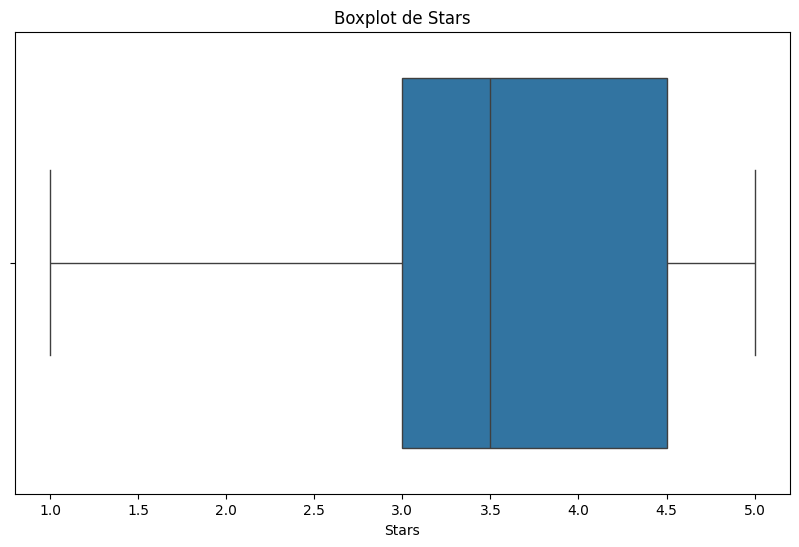

In [32]:
# Boxplot de la columna stars, para mostrar cual es la distribución de las calificaciones.

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_business1['stars'])
plt.title('Boxplot de Stars')
plt.xlabel('Stars')
plt.show()

La gráfica es un **boxplot** que muestra la distribución de la variable `stars` en `df_business1`:  

- **Mediana (~3.5):** Representa el valor central de las calificaciones.  
- **Rango intercuartílico (IQR):** La caja va desde aproximadamente 3.0 hasta 4.5, lo que indica que el 50% de los establecimientos tienen calificaciones en este rango.  
- **Bigotes:** Se extienden desde **1.0 hasta 5.0**, lo que indica que las calificaciones abarcan todo el espectro posible sin valores atípicos visibles.  
- **Simetría:** La distribución parece bastante equilibrada, con la mediana cerca del centro de la caja.  

Esto sugiere que la mayoría de los negocios tienen calificaciones entre **3 y 4.5 estrellas**, con pocos en los extremos de 1 y 5 estrellas.

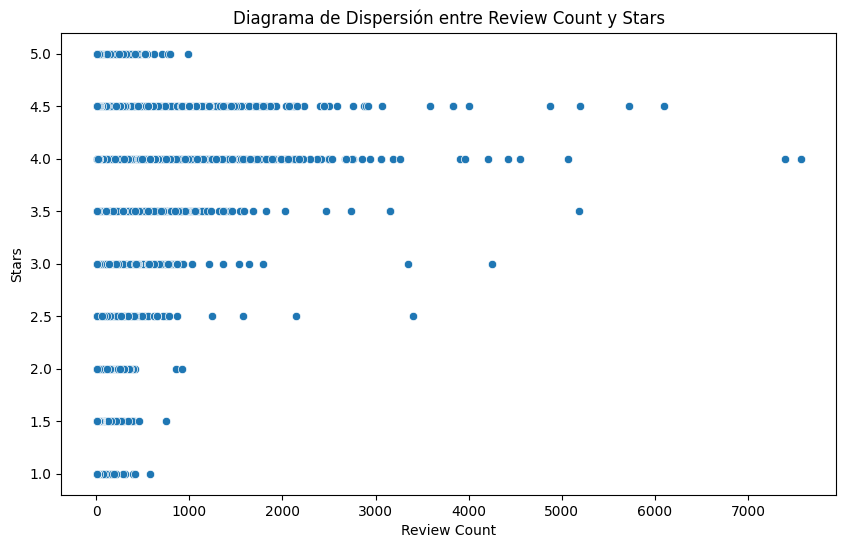

In [33]:
# Diagrama de dispersión entre review_count y stars para representar cómo se relacionan el número de reseñas (review_count) con la calificación (stars).
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_business1['review_count'], y=df_business1['stars'])
plt.title('Diagrama de Dispersión entre Review Count y Stars')
plt.xlabel('Review Count')
plt.ylabel('Stars')
plt.show()

La gráfica es un **diagrama de dispersión** que muestra la relación entre la cantidad de reseñas (**review_count**) y la calificación (**stars**) de los negocios en `df_business1`:  

- **Distribución discreta:** Las calificaciones (`stars`) solo toman valores específicos (1, 1.5, 2, etc.), lo que forma líneas horizontales en la gráfica.  
- **Tendencia:** No parece haber una correlación clara entre la cantidad de reseñas y la calificación, ya que los puntos están distribuidos de manera bastante uniforme.  
- **Acumulación de datos:** La mayoría de los negocios tienen menos de 1000 reseñas, pero algunos alcanzan más de 7000.  
- **Calificaciones más altas:** Negocios con muchas reseñas tienden a tener calificaciones entre 4 y 5 estrellas, aunque también hay casos con menor puntaje.  

En general, la cantidad de reseñas no garantiza una mejor calificación, pero los negocios con muchas reseñas suelen tener valores más altos de `stars`.

In [34]:
df_business1.shape

(150346, 14)

In [35]:
df_business1[df_business1["stars"] <= 3].shape # Contar cuántos negocios tienen una calificación de 3 estrellas o menos en el DataFrame.

(49214, 14)

El tamaño original de df_business1 es (150,346, 15), lo que significa que tiene 150,346 filas y 15 columnas.

El resultado (49,214, 14) indica que 49,214 negocios (32.7% del total) tienen una calificación de 3 estrellas o menos.

Esto sugiere que casi un tercio de los negocios tienen una calificación baja o regular, mientras que el 67.3% restante tiene más de 3 estrellas, lo que podría indicar una tendencia general hacia buenas calificaciones en el dataset.

## ANALISIS DE LAS CATEGORIAS

In [36]:
df_business1['categories'].head() # Para visualizar el contenido de las categorias, se observa que estan anidadas. 

0    Doctors, Traditional Chinese Medicine, Naturop...
1    Shipping Centers, Local Services, Notaries, Ma...
2    Department Stores, Shopping, Fashion, Home & G...
3    Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                            Brewpubs, Breweries, Food
Name: categories, dtype: object

In [37]:
df_business1[df_business1['categories'] == 'Restaurants'] # Para observar si existen negocios con restaurantes como unica categoria. 

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3655,x2J-YIFeGZ-nsezzooVA9g,Twenty 21,2005 Market St,Philadelphia,NV,19103,39.954108,-75.174671,3.0,8,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",Restaurants,None
5873,VlrSuulqTFeQfV2PToJGvg,Fung Garden,5118 Gall Blvd,Zephyrhills,FL,33542,28.232059,-82.180394,3.5,8,0,"{'RestaurantsTakeOut': 'True', 'HasTV': 'False...",Restaurants,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
6856,mFE9V6LPpsDRUQLEBsBRRA,Pearl of East,2049 W Oregon Ave,Philadelphia,IN,19145,39.918635,-75.182422,3.0,17,1,"{'RestaurantsGoodForGroups': 'False', 'Busines...",Restaurants,"{'Monday': '10:30-22:30', 'Tuesday': '10:30-22..."
9801,BXUqeFDqvTK2uL6sQd5YnQ,Crazy D’s Hot Chicken,101 University Ter,Reno,FL,89503,39.536288,-119.818231,3.5,37,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...",Restaurants,None
11413,Bf1cdbdHXi8Omlkc7KShkg,Siam Cafe,435 Esplanade Ave,New Orleans,TN,70116,29.961968,-90.057356,4.0,9,0,"{'RestaurantsGoodForGroups': 'True', 'Restaura...",Restaurants,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138060,QNoFrASBpqW8dzdAEIYjNQ,The Brown Pelican,2981 Cliff Dr,Santa Barbara,AZ,93109,34.403821,-119.743656,4.0,11,0,"{'BusinessParking': '{'garage': False, 'street...",Restaurants,None
140119,4IvQU16RBKuLtpgx8yLqmQ,Hunan Palace,6118 Lancaster Ave,Philadelphia,FL,19151,39.983388,-75.244222,4.5,7,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...",Restaurants,None
142167,rdk3Q_YyWYVKo9vfOp0bkw,Jester Mardi Gras Cafe,730 Saint Peter St,New Orleans,IN,70116,29.958251,-90.065566,1.5,6,1,None,Restaurants,None
144032,YmvS3dxutT01_p7thyD8wg,Buca Di Beppo,11511 N Dale Mabry Hwy,Tampa,MO,33618,28.053802,-82.503277,4.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'Restaura...",Restaurants,None


In [38]:
df_business1['categories'].head()

0    Doctors, Traditional Chinese Medicine, Naturop...
1    Shipping Centers, Local Services, Notaries, Ma...
2    Department Stores, Shopping, Fashion, Home & G...
3    Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                            Brewpubs, Breweries, Food
Name: categories, dtype: object

In [39]:
# Función para normalizar la columna "categories"
def normalize_entry(entry):
    if isinstance(entry, str):  
        categories = [cat.strip() for cat in entry.split(", ")]  # Separar por ", " y limpiar espacios
        return pd.DataFrame({"category": categories})  # Crear DataFrame con una columna "category"
    return None  # Retornar None si el valor no es válido

expanded_dfs = []

# Iterar sobre las filas del DataFrame
for idx, row in df_business1.iterrows():
    entry = row['categories']

    if pd.isna(entry) or entry.strip() == "":
        continue  # Saltar filas sin datos

    normalized_df = normalize_entry(entry)
    
    if normalized_df is not None and not normalized_df.empty:
        normalized_df['business_id'] = row['business_id']  # Mantener relación con el negocio
        expanded_dfs.append(normalized_df)

# Concatenar los DataFrames expandidos
df_categories = pd.concat(expanded_dfs, ignore_index=True) if expanded_dfs else pd.DataFrame()

# Reordenar columnas para que 'business_id' esté primero
df_categories = df_categories[['business_id', 'category']]

In [40]:
df_categories.shape # Para verificar la cantidad de datos resultantes en el nuevo df. 

(668592, 2)

In [41]:
df_categories.head() # Para verificar la salida de la función de normalización. 

,business_id,category
0,Pns2l4eNsfO8kk83dixA6A,Doctors
1,Pns2l4eNsfO8kk83dixA6A,Traditional Chinese Medicine
2,Pns2l4eNsfO8kk83dixA6A,Naturopathic/Holistic
3,Pns2l4eNsfO8kk83dixA6A,Acupuncture
4,Pns2l4eNsfO8kk83dixA6A,Health & Medical


Se requiere eliminar los espacios y reemplazarlos por "_" para poder reagrupar las categorías. 

In [42]:
# Función para normalizar la columna "categories"
def normalize_entry(entry):
    if isinstance(entry, str):  
        categories = [cat.strip().replace(" ", "_") for cat in entry.split(", ")]  # Reemplazar espacios por "_"
        return pd.DataFrame({"category": categories})  # Crear DataFrame con una columna "category"
    return None  # Retornar None si el valor no es válido

expanded_dfs = []

# Iterar sobre las filas del DataFrame
for idx, row in df_business1.iterrows():
    entry = row['categories']

    if pd.isna(entry) or entry.strip() == "":
        continue  # Saltar filas sin datos

    normalized_df = normalize_entry(entry)
    
    if normalized_df is not None and not normalized_df.empty:
        normalized_df['business_id'] = row['business_id']  # Mantener relación con el negocio
        expanded_dfs.append(normalized_df)

# Concatenar los DataFrames expandidos
df_categories = pd.concat(expanded_dfs, ignore_index=True) if expanded_dfs else pd.DataFrame()

# Reordenar columnas para que 'business_id' esté primero
df_categories = df_categories[['business_id', 'category']]

In [43]:
df_categories.head() # Para verificar la salida

,business_id,category
0,Pns2l4eNsfO8kk83dixA6A,Doctors
1,Pns2l4eNsfO8kk83dixA6A,Traditional_Chinese_Medicine
2,Pns2l4eNsfO8kk83dixA6A,Naturopathic/Holistic
3,Pns2l4eNsfO8kk83dixA6A,Acupuncture
4,Pns2l4eNsfO8kk83dixA6A,Health_&_Medical


In [44]:
df_categories[df_categories["business_id"] == "0bPLkL0QhhPO5kt1_EXmNQ"] # Para verificar la salida por id

,business_id,category
66,0bPLkL0QhhPO5kt1_EXmNQ,Food
67,0bPLkL0QhhPO5kt1_EXmNQ,Delis
68,0bPLkL0QhhPO5kt1_EXmNQ,Italian
69,0bPLkL0QhhPO5kt1_EXmNQ,Bakeries
70,0bPLkL0QhhPO5kt1_EXmNQ,Restaurants


In [45]:
df_categories[df_categories["category"] == "Italian"]

,business_id,category
41,k0hlBqXX-Bt0vf1op7Jr1w,Italian
68,0bPLkL0QhhPO5kt1_EXmNQ,Italian
104,9OG5YkX1g2GReZM0AskizA,Italian
123,QdN72BWoyFypdGJhhI5r7g,Italian
189,ljxNT9p0y7YMPx0fcNBGig,Italian
...,...,...
667756,-KNgMklrxgRX2-T6xXeTZA,Italian
667937,oAsfYTJE3cOJXk7Dmb-1TQ,Italian
668382,gPr1io7ks0Eo3FDsnDTYfg,Italian
668418,wVxXRFf10zTTAs11nr4xeA,Italian


In [46]:
# Para contar cuántas veces aparece cada categoría y convertirlo en DataFrame
df_category_counts = df_categories["category"].value_counts().reset_index()
df_category_counts.columns = ["category", "count"]

In [47]:
df_category_counts.head() #Para verificar la salida de nuevo DataFrame

,category,count
0,Restaurants,52268
1,Food,27781
2,Shopping,24395
3,Home_Services,14356
4,Beauty_&_Spas,14292


In [48]:
df_category_counts.shape

(1311, 2)

In [49]:
df_category_counts[df_category_counts["count"] == 1].shape # Para ver cuantas categorias estan una sola vez. 

(56, 2)

El dataset resultante `df_category_counts` muestra que en `df_business1` hay un total de **1,311 categorías diferentes**. Además, no todas están relacionadas con servicios de hotelería y restaurantes.  

Se identificó que **56 categorías** están asociadas únicamente a un negocio, mientras que las **5 categorías más comunes** en el dataset son:  
1. **Restaurants**  
2. **Food**  
3. **Shopping**  
4. **Home_Services**  
5. **Beauty_&_Spas**  


#### GRAFICO DE CATEGORIAS

Para mostrar las 30 categorias con mayor numero de negocios asociados. 

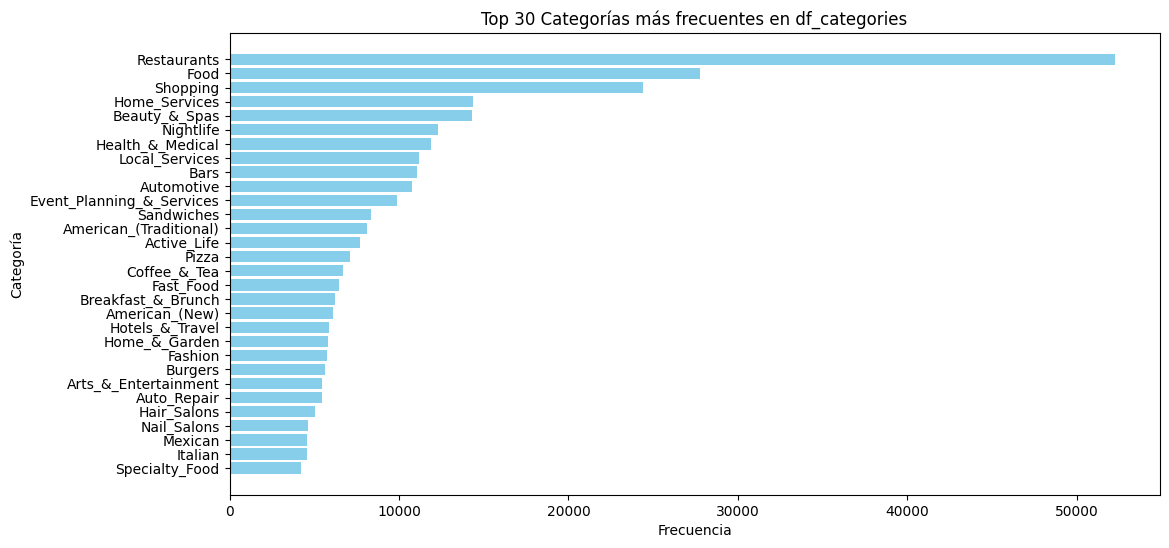

In [50]:
# Contar cuántas veces aparece cada categoría
df_category_counts = df_categories["category"].value_counts().reset_index()
df_category_counts.columns = ["category", "count"]

# Tomar las 20 categorías más comunes para mejor visualización
top_categories = df_category_counts.head(30)

# Graficar
plt.figure(figsize=(12, 6))
plt.barh(top_categories["category"], top_categories["count"], color="skyblue")
plt.xlabel("Frecuencia")
plt.ylabel("Categoría")
plt.title("Top 30 Categorías más frecuentes en df_categories")
plt.gca().invert_yaxis()  # Invertir el eje Y para que la más frecuente esté arriba

In [51]:
df_filtrado = df_business1[df_business1['categories'].str.contains('Restaurants', case=False, na=False)]

In [52]:
df_filtrado.shape # Confirmo que la cantidad de filas en el dataset original corresponden con la informacion resultante. 

(52268, 14)

Es necesario verificar si existe correspondencia entre las **categorías más frecuentes** y las **palabras más repetidas** en la columna `categories` del dataset original `df_business1`.  

In [53]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
df_business1['categories'] = df_business1['categories'].fillna('').str.replace(', ', ';').str.replace(' ', '_')
all_words = ';'.join(df_business1['categories']).split(';')
filtered_words = [word for word in all_words if word.lower() not in stop_words]
word_counts = Counter(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\anavi\AppData\Local\Temp\ipykernel_12392\2560366899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business1['categories'] = df_business1['categories'].fillna('').str.replace(', ', ';').str.replace(' ', '_')


In [54]:
word_counts.most_common(10)

[('Restaurants', 52268),
 ('Food', 27781),
 ('Shopping', 24395),
 ('Home_Services', 14356),
 ('Beauty_&_Spas', 14292),
 ('Nightlife', 12281),
 ('Health_&_Medical', 11890),
 ('Local_Services', 11198),
 ('Bars', 11065),
 ('Automotive', 10773)]

#### Análisis de la Distribución de la Cantidad de Categorías  

El histograma muestra la distribución de la cantidad de categorías por negocio en `df_business1`.  

In [55]:
df_cat_count = df_business1[['business_id', 'categories']] 

In [56]:
df_cat_count.head()

,business_id,categories
0,Pns2l4eNsfO8kk83dixA6A,Doctors;Traditional_Chinese_Medicine;Naturopat...
1,mpf3x-BjTdTEA3yCZrAYPw,Shipping_Centers;Local_Services;Notaries;Mailb...
2,tUFrWirKiKi_TAnsVWINQQ,Department_Stores;Shopping;Fashion;Home_&_Gard...
3,MTSW4McQd7CbVtyjqoe9mw,Restaurants;Food;Bubble_Tea;Coffee_&_Tea;Bakeries
4,mWMc6_wTdE0EUBKIGXDVfA,Brewpubs;Breweries;Food


In [57]:
# Quiero contar la cantidad de categorias que tiene asignado cada negocio
df_cat_count['count'] = df_cat_count['categories'].fillna('').apply(lambda x: len(x.split(';')))

C:\Users\anavi\AppData\Local\Temp\ipykernel_12392\2966186068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_count['count'] = df_cat_count['categories'].fillna('').apply(lambda x: len(x.split(';')))


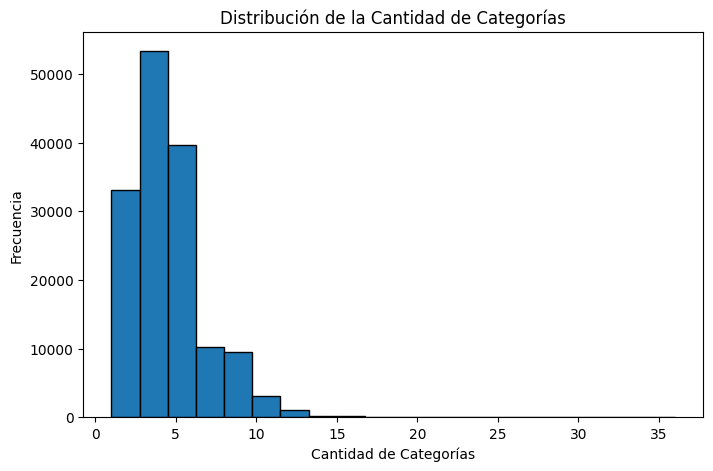

In [58]:
plt.figure(figsize=(8,5))
plt.hist(df_cat_count['count'], bins=20, edgecolor='black')
plt.xlabel('Cantidad de Categorías')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Cantidad de Categorías')
plt.show()

El histograma muestra que la mayoría de los negocios tienen entre **1 y 5 categorías**, con un pico en **3 categorías**. La distribución tiene una **cola a la derecha**, indicando que algunos negocios tienen más de 10 categorías, pero son poco frecuentes. Esto sugiere que la mayoría de los negocios están categorizados de manera específica, mientras que unos pocos tienen múltiples etiquetas.  

In [59]:
df_cat_count.shape

(150346, 3)

In [60]:
df_cat_count[df_cat_count["count"] >= 16].shape

(148, 3)

En el dataset `df_business1`, hay un total de **150,346 negocios**. De estos, **148 negocios** tienen **16 o más categorías**, lo que representa solo **0.098%** del total. Esto indica que la mayoría de los negocios tienen pocas categorías asignadas, mientras que un pequeño grupo posee una cantidad excepcionalmente alta, posiblemente porque ofrecen una amplia variedad de servicios o productos.  

## DISTRIBUCION DE NEGOCIOS POR ESTADO

In [61]:
df_states = df_business1['state'].value_counts().reset_index()

In [62]:
df_states.head(15) # Para mostrar los estados con mayor numero de negocios

,state,count
0,PA,34039
1,FL,26329
2,TN,12056
3,IN,11246
4,MO,10913
5,LA,9924
6,AZ,9912
7,NJ,8536
8,NV,7715
9,AB,5573


In [63]:
df_businessFL = df_business1[df_business1['state'] == 'FL']

In [64]:
df_business1[df_business1['state'] == 'VT']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
144015,aXvUO0KwkD3Hp5WrY52zLw,Brookhaven Market,3510 Edgmont Ave,Brookhaven,VT,19015,39.869814,-75.384818,4.0,8,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",Restaurants;Grocery;Food;Delis,"{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."


In [65]:
df_business1.to_csv('Business.csv', index=False, encoding='utf-8')

## ETL CATEGORIES

Se realizará un filtrado de categorías para conservar únicamente los `id_business` de los negocios que pertenezcan a la categoría de **Hoteles, Restaurantes y Turismo**

In [ ]:
df_cat_etl = df_categories # Creo un ETL espejo para hacer la limpieza

In [ ]:
df_cat_etl.columns #para ver las columnas

Index(['business_id', 'category'], dtype='object')

In [ ]:
df_category = df_cat_etl #Necesito tener otro espejo para hacer varios cambios

In [ ]:
df_category.columns # para ver las columnas

Index(['business_id', 'category'], dtype='object')

En el segundo espejo creado voy a eliminar la columna `id_business` y posteriormente voy a eliminar todos los duplicados en el `df_category`.

In [96]:
df_category = df_category.drop(columns=['business_id'], errors='ignore')
df_category = df_category.drop_duplicates(subset=['category'])

In [ ]:
df_category.shape # Para confirmar el tamaño

(1311, 1)

In [ ]:
df_category[df_category['category'] == "Chinese"] # Filtro para ver un ejemplo

,category
214,Chinese


In [ ]:
df_category.columns # Para ver que columnas tengo. 

Index(['category'], dtype='object')

Anteriormente, para evitar conflictos, reemplacé las palabras `'and'` por `'&'` y los espacios por `'_'`. Ahora, volveré a dejarlos como estaban.  

In [ ]:
df_category['category'] = df_category['category'].str.replace('_', ' ').str.replace('&', 'and')

Con la siguiente función, busco las categorías que tienen similitud. Dado que es una lista larga (1,311 categorías), selecciono las palabras manualmente.  

Luego, utilizo una función `lambda` y creo una nueva columna en formato binario, donde:  
- `1` significa que pertenecen a **Hoteles, Restaurantes y Turismo**.  
- `0` significa que pertenecen a **otras categorías**.  

In [ ]:
# Lista de palabras clave basadas en las que he visto en el dataframe desanidado
palabras_clave = [
    'hotel', 'lodging', 'accommodation', 'inn', 'motel', 'resort', 'hostel', 'bed', 'breakfast', 'suite', 'vacation', 'rental', 'falafel', 'fish', 'restaurants',
    'guesthouse', 'villa', 'chalet', 'apartment', 'spa', 'nightlife', 'beer', 'chese', 'chicken', 'cheese', 'cakes', 'donuts', 'empanadas', 'fondue', 'tacos', 'wraps',
    'restaurant', 'food', 'bar', 'cafe', 'bistro', 'diner', 'pub', 'eatery', 'tavern', 'grill', 'cucina', 'cupcake', 'grocery', 'fruit', 'gelato', 'club', 'waffles',
    'pizzeria', 'bakery', 'fast', 'buffet', 'steakhouse', 'seafood', 'coffee', 'tea', 'brasserie', 'truck', 'kosher', 'korean', 'kitchen', 'chef', 'tex-mex', 'wine',
    'sushi', 'italian', 'mexican', 'chinese', 'bagel', 'burger', 'sandwich', 'yogurt', 'dog', 'pizza', 'salad', 'soup', 'deli', 'brewer', 'asian', 'japanese', 'event'
]

# Crear una nueva columna binaria
df_category['es_hotel_restaurante'] = df_category['category'].apply(
    lambda x: 1 if any(word in x.lower() for word in palabras_clave) else 0
)

# Ver el resultado
print(df_category.head(10))

                       category  es_hotel_restaurante
0                       Doctors                     0
1  Traditional Chinese Medicine                     1
2         Naturopathic/Holistic                     0
3                   Acupuncture                     0
4              Health y Medical                     0
5                 Nutritionists                     0
6              Shipping Centers                     0
7                Local Services                     0
8                      Notaries                     0
9               Mailbox Centers                     0


In [102]:
# Filtrar solo las filas que pertenecen a hoteles y restaurantes
df_hot_rest = df_category[df_category['es_hotel_restaurante'] == 1]
df_hot_rest = df_hot_rest.sort_values(by='category')

In [103]:
df_hot_rest

,category,es_hotel_restaurante
975,ATV Rentals/Tours,1
5220,Amateur Sports Teams,1
264176,Apartment Agents,1
872,Apartments,1
19071,Art Space Rentals,1
...,...,...
524,Wine Tours,1
369,Wine y Spirits,1
1760,Wineries,1
362,Wraps,1


In [ ]:
# Para filtrar las que no pertenecern a hoteles y restaurantes
df_hot_rest_no = df_category[df_category['es_hotel_restaurante'] == 0] 
df_hot_rest_no = df_hot_rest_no.sort_values(by='category')


In [105]:
df_hot_rest_no

,category,es_hotel_restaurante
256291,3D Printing,0
1426,Acai Bowls,0
36,Accessories,0
6648,Accountants,0
5773,Acne Treatment,0
...,...,...
4878,Workers Compensation Law,0
244,Yoga,0
176071,Ziplining,0
13828,Zoos,0


In [106]:
df_category.head()

,category,es_hotel_restaurante
0,Doctors,0
1,Traditional Chinese Medicine,1
2,Naturopathic/Holistic,0
3,Acupuncture,0
4,Health y Medical,0


En el DataFrame `df_cat_etl`, que contiene la columna `business_id`, incluyo la información sobre si pertenecen a la categoría que estoy buscando.  

In [ ]:
df_cat_etl = pd.merge(df_cat_etl, df_category, on='category', how='inner')

# Renombramos la columna 'es_hotel_restaurante' a 'HRT Y/N'
df_cat_etl.rename(columns={'es_hotel_restaurante': 'subcategory'}, inplace=True)


In [ ]:
df_cat_etl #Para visualizar el resultado.

,business_id,category,subcategory
0,Pns2l4eNsfO8kk83dixA6A,Doctors,0
1,Pns2l4eNsfO8kk83dixA6A,Naturopathic/Holistic,0
2,Pns2l4eNsfO8kk83dixA6A,Acupuncture,0
3,Pns2l4eNsfO8kk83dixA6A,Nutritionists,0
4,mpf3x-BjTdTEA3yCZrAYPw,Notaries,0
...,...,...,...
321988,_QAMST-NrQobXduilWEqSw,Fashion,0
321989,mtGm22y5c2UHNXDFAjaPNw,Shopping,0
321990,mtGm22y5c2UHNXDFAjaPNw,Bikes,0
321991,jV_XOycEzSlTx-65W906pg,Piercing,0


In [ ]:
# Cambio los nombres en subcategoria para que sea más entendible
df_cat_etl['subcategory'] = df_cat_etl['subcategory'].replace({  
    1: 'Hotels, restaurants and tourism',  
    0: 'Other categories'  
})

In [ ]:
# Filtro solo la categoria que vamos a estudiar.
df_filtered = df_cat_etl[df_cat_etl['subcategory'] == 'Hotels, restaurants and tourism']

In [111]:
df_filtered

,business_id,category,subcategory
8,MTSW4McQd7CbVtyjqoe9mw,Restaurants,"Hotels, restaurants and tourism"
9,MTSW4McQd7CbVtyjqoe9mw,Food,"Hotels, restaurants and tourism"
11,mWMc6_wTdE0EUBKIGXDVfA,Brewpubs,"Hotels, restaurants and tourism"
12,mWMc6_wTdE0EUBKIGXDVfA,Breweries,"Hotels, restaurants and tourism"
13,mWMc6_wTdE0EUBKIGXDVfA,Food,"Hotels, restaurants and tourism"
...,...,...,...
321970,WnT9NIzQgLlILjPT0kEcsQ,Restaurants,"Hotels, restaurants and tourism"
321971,WnT9NIzQgLlILjPT0kEcsQ,Mexican,"Hotels, restaurants and tourism"
321978,2O2K6SXPWv56amqxCECd4w,Restaurants,"Hotels, restaurants and tourism"
321979,2O2K6SXPWv56amqxCECd4w,Food,"Hotels, restaurants and tourism"


In [ ]:
df_cat_etl.to_csv('etl_business.csv', index=False, encoding='utf-8') # Exporto la base limpia a excel, incluyendo ambas categorias. 